## Steps involved in PCA


*   Step 1: Center the dataset

*   Step 2: Calculate the covariance matrix of the centered data

*   Step 3: Compute the eigenvectors and eigenvalues

*   Step 4: Sort the eigenvalues in descending order and choose the top k eigenvectors corresponding to the highest eigenvalues

*   Step 5: Transform the original data by multiplying it with the selected eigenvectors(PCs) to obtain a lower-dimensional representation.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# The Dataset.

X = np.array([(4,1),(5,4),(6,3),(7,4),(2,-1),(-1,-2),(0,-3),(-1,-4)]).T
print("The Dataset\n",X)
print()
print("# rows denotes the dimension and #columns denotes the #data points in dataset\n ",X.shape)

The Dataset
 [[ 4  5  6  7  2 -1  0 -1]
 [ 1  4  3  4 -1 -2 -3 -4]]

# rows denotes the dimension and #columns denotes the #data points in dataset
  (2, 8)


In [3]:
print(sum(X[0,:])/8)
print(sum(X[1,:])/8)
X.mean(axis=1 # This calculates mean along the row.
       )

2.75
0.25


array([2.75, 0.25])

## Visualization of the data points

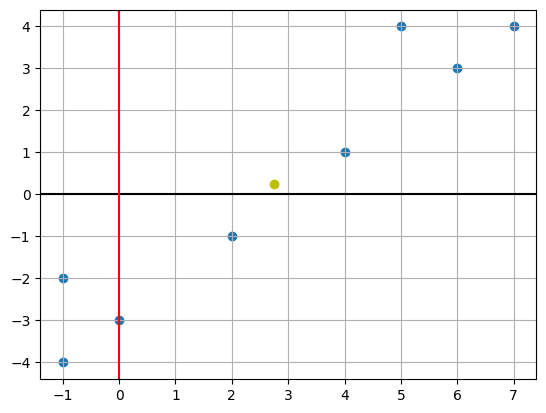

In [4]:
plt.scatter(x=X[0,:],y=X[1,:])
plt.axhline(y=0,color = 'k') # this draws horizontal line at y = 0
plt.axvline(x=0,color = 'r') # this draws vertical line at x = 0
plt.scatter(x=X.mean(axis=1)[0],y=X.mean(axis=1)[1],c='y')
plt.grid()

## Now center the data.

In [5]:
def center(x):
    # Here we do subtract to the dataset. to perform subtraction we need to reshape the matrix in 2x1 form. it is previously in the form of 1x2
    return X - X.mean(axis=1).reshape(2,1)

X_centered = center(X)

In [6]:
X_centered

array([[ 1.25,  2.25,  3.25,  4.25, -0.75, -3.75, -2.75, -3.75],
       [ 0.75,  3.75,  2.75,  3.75, -1.25, -2.25, -3.25, -4.25]])

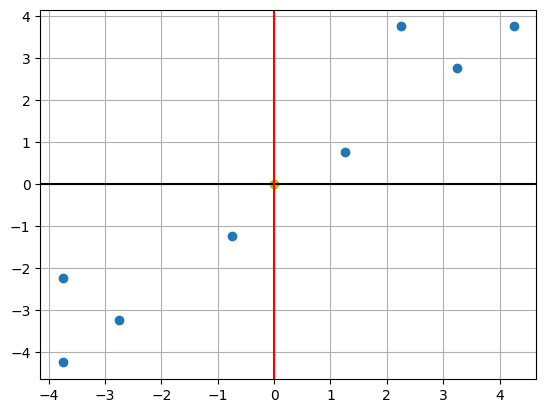

In [7]:
plt.scatter(x=X_centered[0,:],y=X_centered[1,:])
plt.axhline(y=0,color = 'k') # this draws horizontal line at y = 0
plt.axvline(x=0,color = 'r') # this draws vertical line at x = 0
plt.scatter(x=X_centered.mean(axis=1)[0],y=X_centered.mean(axis=1)[1],c='y')
plt.grid()

## Comparing the two graphs.
just copied and pasted the codes.

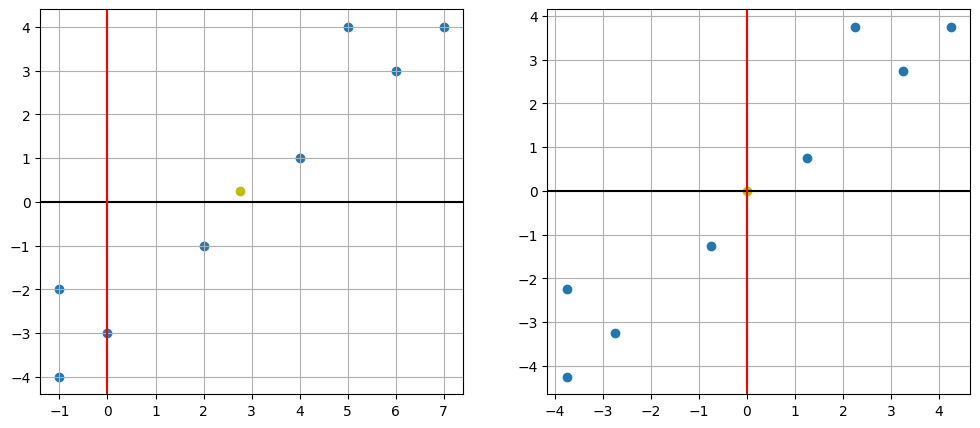

In [8]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(x=X[0,:],y=X[1,:])
plt.axhline(y=0,color = 'k') # this draws horizontal line at y = 0
plt.axvline(x=0,color = 'r') # this draws vertical line at x = 0
plt.scatter(x=X.mean(axis=1)[0],y=X.mean(axis=1)[1],c='y')
plt.grid()

plt.subplot(1,2,2)

plt.scatter(x=X_centered[0,:],y=X_centered[1,:])
plt.axhline(y=0,color = 'k') # this draws horizontal line at y = 0
plt.axvline(x=0,color = 'r') # this draws vertical line at x = 0
plt.scatter(x=X_centered.mean(axis=1)[0],y=X_centered.mean(axis=1)[1],c='y')
plt.grid()

## Finding the covariance matrix

The covariance matrix is given by
$\mathbf{C} \ =\ \frac{1}{n}\sum \limits_{i\ =\ 1}^{n} \mathbf {x}_{i}\mathbf {x}_{i}^{T} \ =\ \frac{1}{n}\mathbf{XX}^{T}$

In [9]:
def covarince(X):
    # "@" denotes matrix multiplication
    return (X @ X.T)/X.shape[1]

covarince(X_centered)

array([[8.9375, 8.5625],
       [8.5625, 8.9375]])